In [106]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
def create_dataset(annotations_path, json_path, images_path):
    dataset = {
        "file": [],
        "name": [],
        "xmin": [],
        "ymin": [],
        "xmax": [],
        "ymax": [],
    }

    for json_file in glob.glob(annotations_path + json_path + "/*.json"):
        # JSON 파일 읽기
        with open(json_file, 'r', encoding='euc-kr') as f:
            json_data = json.load(f)

        for entry in json_data:
            filename = entry["filename"]
            face_exp_uploader = entry.get("faceExp_uploader")
            image_file = os.path.join(images_path, filename)

            if not os.path.exists(image_file):
                print(f"Image file not found: {filename}")
                continue  # 이미지 파일이 없으면 해당 항목 건너뛰기

            if face_exp_uploader:
                boxes = entry.get("annot_A", {}).get("boxes")
                if boxes:
                    dataset["file"].append(filename)
                    dataset["name"].append(face_exp_uploader)
                    dataset["xmin"].append(boxes.get("minX"))
                    dataset["ymin"].append(boxes.get("minY"))
                    dataset["xmax"].append(boxes.get("maxX"))
                    dataset["ymax"].append(boxes.get("maxY"))
                else:
                    print(f"No boxes found for {filename}")

    return dataset

In [108]:
annotations_path = "/content/drive/MyDrive/감정따뜻쟁이/label/"
train_images_path = "/content/drive/MyDrive/yolo_output/train/images/"
test_images_path = "/content/drive/MyDrive/yolo_output/test/images/"
val_images_path = "/content/drive/MyDrive/yolo_output/val/images/"

dataset1 = create_dataset(annotations_path, "train", train_images_path)
dataset2 = create_dataset(annotations_path, "test", test_images_path)
dataset3 = create_dataset(annotations_path, "val", val_images_path)


Image file not found: 7zwecfe6e57f975ee8b238b355e3e87923c4557383daae96720c1b8c3f669g9m2.jpg
Image file not found: oxmt62fbb28fafcdaa8d64e75a332e1d506d6a079cb45fc9e00c576c40fbeo0wy.jpg
Image file not found: s1mu862ea97f26b2720eeecb51156f6e32e8523fd62f3f04ef2f727639f52d7g3.jpg
Image file not found: twdva8d723865fa1005873a6967797c75f3dd83197f13f7daa3e3926947071al6.jpg
Image file not found: 5yid6d7ae32bf14b1343da46cfdb3fdffc8e1c64baf4fb1b175690f648a870v69.jpg
Image file not found: bpv531e5cebdb1c00085158bb0677c5596ccabf1c8a5cb0007991571bf306wcd4.jpg
Image file not found: s1q397a38900c1e1f950496109900e7c01f0630459790d8590010655c4090vlh0.jpg
Image file not found: 7m2k46c05803855399ea1ee1911875ee59e05640c93135c0bc91b5660456cdo8k.jpg
Image file not found: n55yc741f09701506c7eb5ba30533db35c905ab5bf0597b5652ece03c5950ozv1.jpg
Image file not found: bid7b3c93409e1d83514689337f6d3d63a338339d71c9ce7fded153d3576fk2ml.jpg
Image file not found: if0lfc4b517c6597e3656dbea350e406e1b5ae4e175e46059706487590

In [109]:
df1 = pd.DataFrame(dataset1)
df2 = pd.DataFrame(dataset2)
df3 = pd.DataFrame(dataset3)

In [110]:
df1.head()

,file,name,xmin,ymin,xmax,ymax
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262


In [111]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df.head()

,file,name,xmin,ymin,xmax,ymax
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   file    7550 non-null   object 
 1   name    7550 non-null   object 
 2   xmin    7550 non-null   float64
 3   ymin    7550 non-null   float64
 4   xmax    7550 non-null   float64
 5   ymax    7550 non-null   float64
dtypes: float64(4), object(2)
memory usage: 354.0+ KB


In [112]:
name_dict = {
    '분노': 0,
    '기쁨': 1,
    '당황': 2,
    '슬픔':3
}

df['class'] = df['name'].map(name_dict)

In [113]:
df1 = pd.read_csv('/content/file_size.csv')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7428 entries, 0 to 7427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    7428 non-null   object
 1   width   7428 non-null   int64 
 2   height  7428 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 174.2+ KB


In [114]:
df = pd.merge(df, df1, on='file', how='inner')

In [ ]:
#os.chdir('/content/drive/MyDrive/yolo_output')
#os.mkdir('./train')
#os.mkdir('./val')
#os.mkdir('./test')
#os.mkdir('./train/images')
#os.mkdir('./train/labels')
#os.mkdir('./test/images')
#os.mkdir('./test/labels')
#os.mkdir('./val/images')
#os.mkdir('./val/labels')

In [58]:
df.head()

,file,name,xmin,ymin,xmax,ymax,class,width,height
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,1504.474500,642.640800,2243.173300,1596.718300,1,3264,2448
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,1316.008500,515.588943,2075.192400,1604.840914,1,2944,2208
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,1563.979100,630.578000,2147.691000,1409.854700,1,3264,2448
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,990.366600,724.068700,1799.860800,1808.655200,1,3264,2448
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,1129.214047,456.744658,1995.204053,1707.601262,1,2880,2160


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   file    7426 non-null   object 
 1   name    7426 non-null   object 
 2   xmin    7426 non-null   float64
 3   ymin    7426 non-null   float64
 4   xmax    7426 non-null   float64
 5   ymax    7426 non-null   float64
 6   class   7426 non-null   int64  
 7   width   7426 non-null   int64  
 8   height  7426 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 522.3+ KB


In [ ]:
import os

input_data_train = "/content/drive/MyDrive/yolo_output/train/images/"
input_data_test = "/content/drive/MyDrive/yolo_output/test/images/"
input_data_val = "/content/drive/MyDrive/yolo_output/val/images/"

# train 폴더에 있는 이미지 파일 이름 리스트 가져오기
train = os.listdir(input_data_train)
test = os.listdir(input_data_test)
val = os.listdir(input_data_val)

In [61]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(fileNames, test_size=0.2, random_state=42)
# test, val = train_test_split(test, test_size=0.7, random_state=42)
print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of test =", len(test))

Length of Train = 5368
Length of Valid = 1053
Length of test = 1141


In [ ]:
#train

In [ ]:
# os.chdir('/content/drive/MyDrive/yolo_output/')
# os.mkdir('./train')
# os.mkdir('./val')
# os.mkdir('./test')
# os.mkdir('./train/images')
# os.mkdir('./train/labels')
# os.mkdir('./test/images')
# os.mkdir('./test/labels')
# os.mkdir('./val/images')
# os.mkdir('./val/labels')

In [ ]:
# from PIL import Image

# input_data = '/content/drive/MyDrive/감정따뜻쟁이/img/train/'
# output_data = '/content/drive/MyDrive/yolo_output/'

# emotions = ["happy", "anger", "sadness", "panic"]


# def copyImages(imageList, folder_Name):
#     for image in imageList:
#         for emotion in emotions:
#             img_path = os.path.join(input_data, emotion, image)
#             if os.path.exists(img_path):
#                 img = Image.open(img_path)
#                 img_resized = img.resize((640, 480))
#                 output_path = os.path.join(output_data, folder_Name, "images", image)
#                 img_resized.save(output_path)
#                 print(f"Image {image} copied to {output_path}")
#             else:
#                 print(f"Image {image} does not exist in {emotion} folder")


# # train, val, test 데이터셋의 이미지를 복사
# copyImages(train, "train")
# copyImages(val, "val")
# copyImages(test, "test")


In [116]:
df['xmax'] = (640/df['width'])*df['xmax']
df['ymax'] = (480/df['height'])*df['ymax']
df['xmin'] = (640/df['width'])*df['xmin']
df['ymin'] = (480/df['height'])*df['ymin']

df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

df = df.astype('string')

In [ ]:
# input_data = '/content/drive/MyDrive/yolo_output'

# from PIL import Image
# def copyImages(imageList, folder_Name):
#     for image in imageList:
#         print(input_data+ folder_Name +image)
#         img = Image.open(input_data+image)
#         img1 = img.resize((640, 480))
#         print(output_data+folder_Name+"/images/"+image)
#         _ = img1.save(output_data+folder_Name+"/images/"+image)

# copyImages(train, "train")
# copyImages(val, "val")
# copyImages(test, "test")

In [ ]:
df = df.astype('string')

In [64]:
df.head()

,file,name,xmin,ymin,xmax,ymax,class,width,height,x_center,y_center,box_height,box_width
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,294,126,439,313,1,3264,2448,0.57265625,0.45729166666666665,0.2265625,0.38958333333333334
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,286,112,451,348,1,2944,2208,0.57578125,0.4791666666666667,0.2578125,0.49166666666666664
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,306,123,421,276,1,3264,2448,0.56796875,0.415625,0.1796875,0.31875
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,194,141,352,354,1,3264,2448,0.4265625,0.515625,0.246875,0.44375
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,250,101,443,379,1,2880,2160,0.54140625,0.5,0.3015625,0.5791666666666667


In [ ]:
#df.to_csv("/content/data1.csv", header=False)

In [103]:
df.head()

,file,name,xmin,ymin,xmax,ymax,class,width,height,x_center,y_center,box_height,box_width
0,sfpsd1254c044a197b3440b24c44b0cbe0b294f90ac879...,기쁨,294,126,439,313,0,3264,2448,0.57265625,0.45729166666666665,0.2265625,0.38958333333333334
1,2tby14ba67fea06c15c1c19c15c47b0a7c90bbe3f06076...,기쁨,286,112,451,348,0,2944,2208,0.57578125,0.4791666666666667,0.2578125,0.49166666666666664
2,0jsg06048a28fde3caad404f93dec397e5c579e83c1c2c...,기쁨,306,123,421,276,0,3264,2448,0.56796875,0.415625,0.1796875,0.31875
3,kcj92df0c0404d268c1a2bb901ac34326fd734416b4204...,기쁨,194,141,352,354,0,3264,2448,0.4265625,0.515625,0.246875,0.44375
4,zlye07fb710879977db578f793838be19b15b80543e98b...,기쁨,250,101,443,379,0,2880,2160,0.54140625,0.5,0.3015625,0.5791666666666667


In [104]:
output_data = "/content/drive/MyDrive/yolo_output"

In [105]:
def create_labels(image_list, data_name):
    fileNames = [x.split(",")[0] for x in image_list]
    for name in fileNames:
        data = df[df.file==name]
        box_list = []

        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])

        text = "\n".join(box_list)
        file_name_without_extension = os.path.splitext(name)[0]
        with open(output_data+"/"+data_name+"/labels/"+file_name_without_extension+".txt", "w") as file:
            file.write(text)


create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

In [68]:
# 파일이 저장된 디렉토리 경로
label_dir = output_data + "/train/labels"

# 디렉토리 내의 파일 목록 가져오기
file_list = os.listdir(label_dir)

# 처음 5개 파일의 이름 출력
print("처음 5개의 Label 파일 목록:")
for file_name in file_list[:5]:
    print(file_name)

처음 5개의 Label 파일 목록:
9agzdcce084808523fe2d072e0ea5f98bff3b819d08e3b9a7ffd8c08f8d7ensgu.txt
p76y95ad543e6f5a0fd5fdc2181f48f341816dd811b2fde111169f4fc4f0ay5oe.txt
bnac8a16f22bbd1d62a7762a14fcd44d2d5c16cf896c5fcf2f99f79cdc7685z6x.txt
5o0cc3bbfdfce15e0b4ed070733cf7e1b9dded7a6d5b565addea91c74f93bgk0x.txt
z7ik9894d5e59a4848be7586150c868ec97e117173725a58ece872a38c6a4nzpo.txt


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 14.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [70]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

In [72]:
text = """
train: /content/drive/MyDrive/yolo_output/train
val: /content/drive/MyDrive/yolo_output/val
test: /content/drive/MyDrive/yolo_output/test

# number of classes
nc: 4

# class names
names: [0 : 'anger', 1 : 'happy', 2 : 'panic', 3 : 'sadness']
"""

In [73]:
with open("data.yaml", 'w') as file:
    file.write(text)

In [ ]:
!ls

data.yaml  drive  runs	sample_data  yolov8m.pt  yolov8n.pt


In [127]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml',epochs=20)

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/drive/MyDrive/yolo_output/train/labels.cache... 5364 images, 0 backgrounds, 15 corrupt: 100%|██████████| 5364/5364 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/0xah1dfff2988dd0bb1002299e49a2e81221721df2086792404682f191894jnl2.jpg: ignoring corrupt image/label: negative label values [    -0.0375   -0.048958]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/23wu7abccde2e17cabec7b9eee7cdaacae3cddb0a2369cb1fa7b7c1b6402c8wdv.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0539]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/2tyq2a9227556df5df1c049f899cecbbbb9c2abcd0298f6d2cbcc2eeb725a530h.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0016]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/9mygb9e7e13ceaae90b7b987a93257b32a9c737afbcc827b7877cc862cbcacz03.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0898]
train: WARNING ⚠️ /content/drive/MyDrive/yolo_output/train/images/eg9e62a9cfcd9eabbe75c79dd12d99e99cdd9960ba9d


val: Scanning /content/drive/MyDrive/yolo_output/val/labels.cache... 1049 images, 0 backgrounds, 2 corrupt: 100%|██████████| 1049/1049 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/yolo_output/val/images/f2tiec0c60e99a3ebf72cec60bb22bac18ce947cd0c5e96602c7e8ca777c2cy5g.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0414]
val: WARNING ⚠️ /content/drive/MyDrive/yolo_output/val/images/fsb9ee9a797a7d9c0a74987dba3d9a517de02e1f9cc7bb999b2aaccb177a0fhlk.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0438]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.82G     0.8188      1.546      1.256          9        640: 100%|██████████| 335/335 [01:45<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]

                   all       1047       1047      0.733      0.762       0.78       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.83G     0.7853      1.026      1.238         12        640: 100%|██████████| 335/335 [01:42<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]


                   all       1047       1047      0.671      0.743      0.744      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       6.7G     0.7663     0.9332      1.227         11        640: 100%|██████████| 335/335 [01:40<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.21it/s]

                   all       1047       1047      0.724      0.783      0.823      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       6.8G     0.7444      0.876      1.218         15        640: 100%|██████████| 335/335 [01:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.15it/s]

                   all       1047       1047      0.782      0.795       0.85      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       6.8G     0.7288     0.8192      1.205         11        640: 100%|██████████| 335/335 [01:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]

                   all       1047       1047      0.815      0.851      0.893      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.83G     0.7081     0.7664      1.188          9        640: 100%|██████████| 335/335 [01:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]

                   all       1047       1047      0.784      0.843      0.882      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       6.7G     0.6928     0.7212      1.178         11        640: 100%|██████████| 335/335 [01:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.22it/s]

                   all       1047       1047      0.823      0.849      0.903      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.79G     0.6898     0.7087      1.174         10        640: 100%|██████████| 335/335 [01:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.32it/s]

                   all       1047       1047      0.791      0.773      0.877      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.77G     0.6802     0.6683       1.17         11        640: 100%|██████████| 335/335 [01:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.25it/s]

                   all       1047       1047      0.853      0.828       0.91       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.82G     0.6732     0.6619      1.171         11        640: 100%|██████████| 335/335 [01:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.23it/s]

                   all       1047       1047      0.818      0.869      0.907      0.778


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.72G     0.6234     0.5363      1.204          5        640: 100%|██████████| 335/335 [01:41<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]

                   all       1047       1047      0.778      0.864      0.897      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       6.8G     0.6199     0.5138      1.196          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.22it/s]

                   all       1047       1047      0.864      0.848      0.912      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.79G     0.6085     0.4858       1.19          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.28it/s]

                   all       1047       1047      0.806      0.873      0.905      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.81G     0.6042     0.4687      1.185          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.29it/s]

                   all       1047       1047      0.857      0.837      0.897      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       6.7G     0.5924     0.4475      1.171          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.32it/s]

                   all       1047       1047      0.831      0.875      0.916      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.82G     0.5927     0.4258      1.172          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.27it/s]

                   all       1047       1047      0.852      0.888      0.926      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       6.8G     0.5825     0.4073      1.158          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.27it/s]

                   all       1047       1047       0.84      0.874      0.918      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.82G     0.5754     0.3886      1.155          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.24it/s]

                   all       1047       1047      0.876      0.866      0.923      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       6.7G     0.5684     0.3568      1.149          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.30it/s]

                   all       1047       1047      0.848      0.907       0.93       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.79G     0.5605     0.3378      1.141          5        640: 100%|██████████| 335/335 [01:39<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.23it/s]

                   all       1047       1047      0.852      0.902      0.931      0.813



20 epochs completed in 0.609 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 52.0MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.61it/s]


                   all       1047       1047      0.852      0.903      0.931      0.813
          {0: 'anger'}       1047        271       0.79      0.782      0.864      0.755
          {1: 'happy'}       1047        303      0.964      0.967      0.989      0.876
          {2: 'panic'}       1047        257      0.849      0.911      0.927      0.805
        {3: 'sadness'}       1047        216      0.808      0.952      0.944      0.816
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788d07328d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

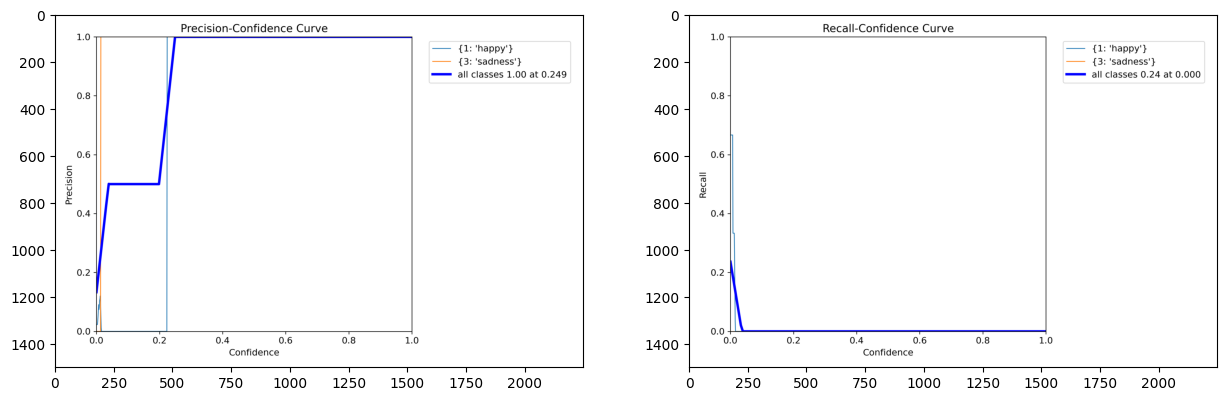

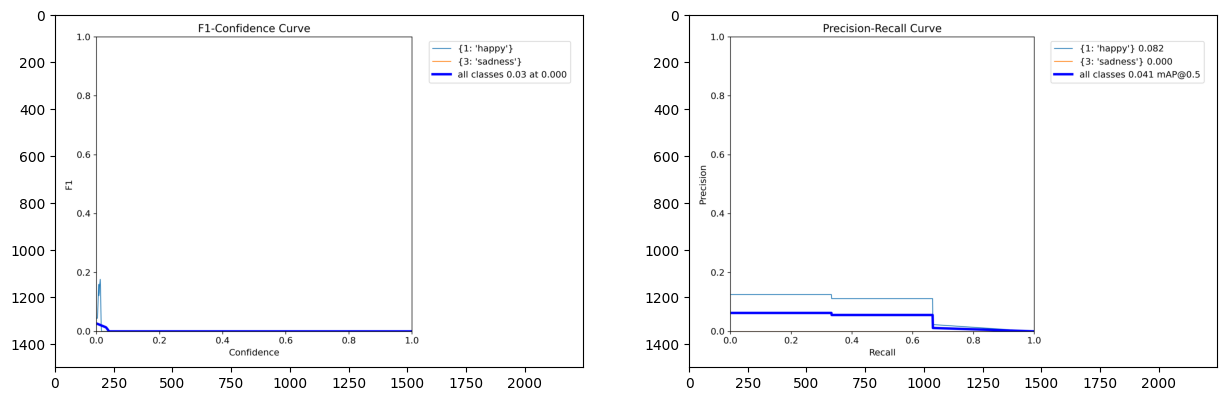

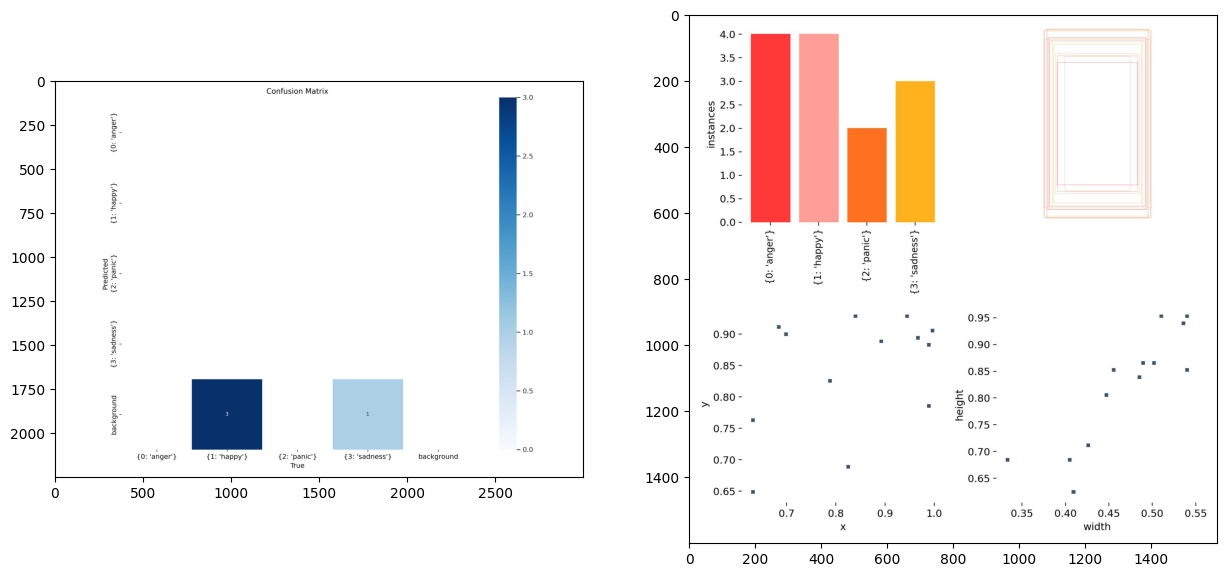

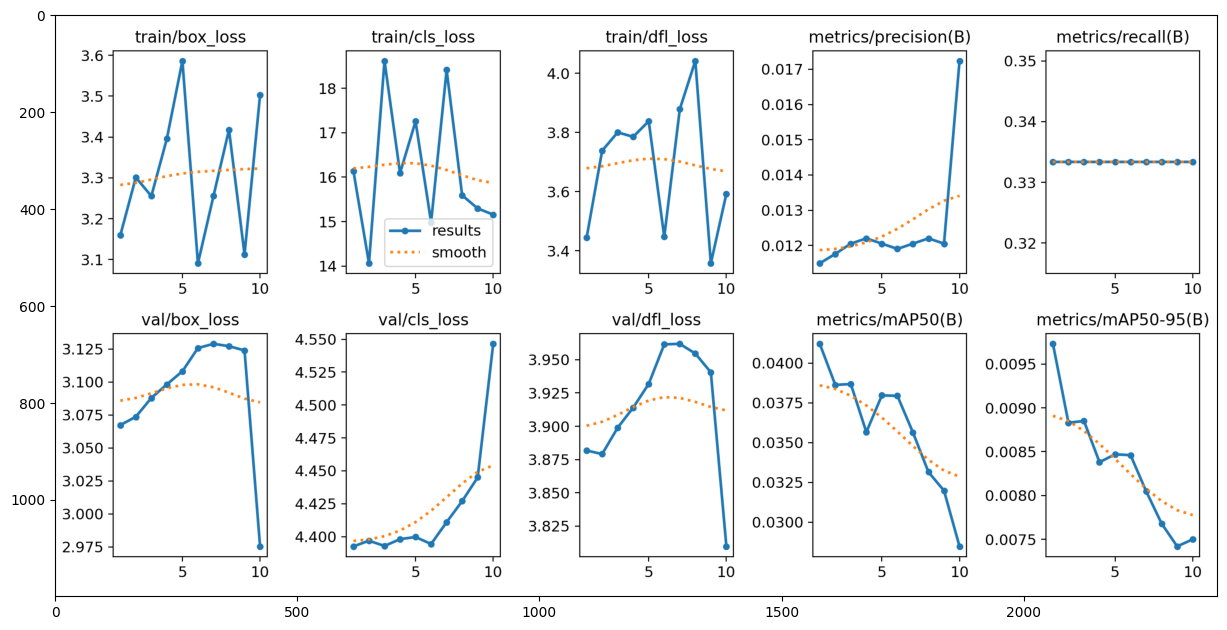

In [75]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [76]:
images_path = '/content/drive/MyDrive/yolo_output/test/images'

In [77]:
import random
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 3)
c=1
for img in imgs:
    print(images_path+'/'+img)
    i=model.predict(source=images_path+'/'+img, conf=0.4, save=True, line_thickness=2)
    c+=1

/content/drive/MyDrive/yolo_output/test/images/7je085addda571facb6cba1f53148004d3d0d1eea2a08cceb0cfb8cec2fa4g8b0.jpg
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/yolo_output/test/images/7je085addda571facb6cba1f53148004d3d0d1eea2a08cceb0cfb8cec2fa4g8b0.jpg: 480x640 1 {3: 'sadness'}, 12.8ms
Speed: 1.3ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train52
/content/drive/MyDrive/yolo_output/test/images/o5gbd863a39b5b7632da5ed7905953e4e7d6c2e60de38afd73f59515882677z2m.jpg
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/yolo_output/test/images/o5gbd863a39b5b7632da5ed7905953e4e7d6c2e60de38afd73f59515882677z2m.jpg: 480x640 1 {3: 'sadness'}, 12.5ms
Speed: 1.3ms prepr

<Figure size 2000x2000 with 0 Axes>

In [78]:
imgs_folders = random.sample(os.listdir('/content/runs/detect'), 2)
imgs_folders

['train2', 'train54']

/content/runs/detect/train54/d50012130b328a97e7d8890e1e80a193a0406a8062b8696e0e10938e8cbdbaini.jpg


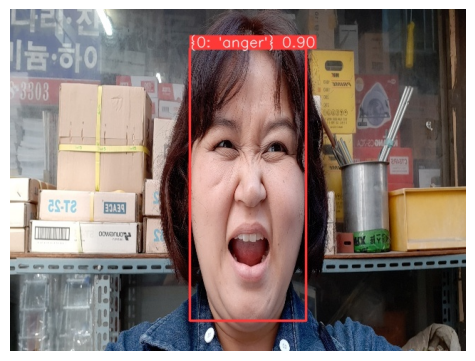

In [79]:
path = '/content/runs/detect/train54/'
imgs = os.listdir(path)
plt.figure(figsize=(20,20))
c=1
for img in imgs:
    print(path+img)
    im = plt.imread(path+img)
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1

In [97]:
from PIL import ImageDraw
from PIL import Image

image_path = "/content/drive/MyDrive/test_happy.jpg"
test_image = Image.open(image_path)

# Perform inference on the test image
results = model.predict(test_image)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(test_image)
for result in results:
    for detection in result:
        label = detection["label"]
        box = detection["box"]
        draw.rectangle(box, outline="red")
        draw.text((box[0], box[1]), label)

# Display the image with bounding boxes
test_image.show()



0: 448x640 (no detections), 12.3ms
Speed: 5.5ms preprocess, 12.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


In [98]:
images_path = '/content/drive/MyDrive/yolo_output/test/images'

import random
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 3)
c=1
for img in imgs:
    print(images_path+'/'+img)
    i=model.predict(source=images_path+'/'+img, conf=0.4, save=True, line_thickness=2)
    c+=1

/content/drive/MyDrive/yolo_output/test/images//
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1137 /content/drive/MyDrive/yolo_output/test/images/00riaf6eb09fb4924b3a7f4b37d3af4870b733b5bfaa8977603fafff94104n4p8.jpg: 480x640 1 {3: 'sadness'}, 15.1ms
image 2/1137 /content/drive/MyDrive/yolo_output/test/images/01h6ce85f03f4589312446c62372f5cb24ea30

FileNotFoundError: /content/drive/MyDrive/yolo_output/test/images/c does not exist

<Figure size 2000x2000 with 0 Axes>

In [124]:
model.predict("/content/drive/MyDrive/test_happy2.jpg", save=True, imgsz=320, conf=0.5)


image 1/1 /content/drive/MyDrive/test_happy2.jpg: 320x320 1 {1: 'happy'}, 146.3ms
Speed: 4.1ms preprocess, 146.3ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/train56


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: "{0: 'anger'}", 1: "{1: 'happy'}", 2: "{2: 'panic'}", 3: "{3: 'sadness'}"}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255,

In [129]:
results = model(["/content/test_happy2.jpg"])
for result in results:
  boxes = result.boxes
  masks = result.masks
  keypoints = result.keypoints
  probs = result.probs
  obb = result.obb
  result.show()
  result.save(filename = "result3.jpg")


0: 608x640 1 {0: 'anger'}, 17.4ms
Speed: 6.0ms preprocess, 17.4ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 640)
